# Notebook Pratique - Classification Binaire

## Instructions importantes!
* Ce Notebook sera utilisé en continu tout au long du cours. Il sera donc important de le garder bien structuré et ordonné.
* À chaque leçon, vous allez rajouter une section à ce Notebook avec les exercices associés aux apprentissages du cours. 
* À la fin du cours, vous obtiendrez un Notebook complet représentant l'entièreté d'un projet d'apprentissage automatique.
* Ce Notebook sera unique et personnalisé pour chaque élève. 
* **Il vous servira donc de référence pour votre projet d'intégration final.**

## Information sur le jeu de données

Tout au long des ateliers, vous allez utiliser ce même jeu de données à plusieurs reprises.

Il s'agit du jeu de données `banknote.csv` représentant des mesures prises sur des photos de billets de banque afin de déterminer s'ils sont des vrais (class = 0) ou des faux (class = 1). 

Lien vers le jeu de données : https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

Voici les colonnes du jeu de données

| Nom original | Nom officiel | Nom pratique |
|--------------|--------------|--------------|
| feature_1    | Variance     | variance     |
| feature_2    | Skewness     | skewness     |
| feature_3    | Curtosis     | curtosis     |
| feature_4    | Entropy      | entropy      |
| prediction   | Class        | class        |

Il y a un total de 1372 billets de banque qui ont été mesurés. Chaque ligne du jeu de données représente les valeurs mesurées pour un billet.

# CORRIGÉ LEÇON #3


In [4]:
import pandas as pd

In [5]:
# 1. Télécharger le jeu de données.
data = pd.read_csv('banknote.csv')

In [6]:
# 2. Vérifier la taille du jeu de données.

# Obetnir un aperçu sommaire
print(data.shape)
# ou 
print(f'Taille du jeu de données: {data.shape}')

# Pour extraire séparément le nombre de lignes et de colonnes
print(f'Nombre de lignes: {data.shape[0]}')
print(f'Nombre de colonnes: {data.shape[1]}')

# (autre méthode) Pour extraire séparément le nombre de lignes et de colonnes
print(f'Nombre de lignes: {len(data.index)}')
print(f'Nombre de colonnes: {len(data.columns)}')

(1372, 5)
Taille du jeu de données: (1372, 5)
Nombre de lignes: 1372
Nombre de colonnes: 5
Nombre de lignes: 1372
Nombre de colonnes: 5


In [7]:
# 3. Explorer visuellement les 10 premières lignes du jeu de données.
data.head(10)

,feature_1,feature_2,feature_3,feature_4,prediction
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [8]:
# 4. Modifier le nom des colonnes en leur attribuant les nom mentionnés ci-haut.

# Définir les nouveaux noms des colonnes dans une liste (en ordre)
colnames = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Assigner les nouveaux noms de colonnes dans le jeu de données
data.columns = colnames

# Vérifier les changements sur les deux premières lignes
data.head(2)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


# CORRIGÉ LEÇON #4

In [9]:
# 1. Aperçu des données
data.head(20)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [10]:
# 2. Dimensions du jeu de données

# Dimension du jeu de données
print(data.shape)

# Noms des colonnes
print(data.columns)

# Index des lignes
print(data.index)

# Nombre de colonnes
print(f'Nombre de colonnes: {len(data.columns)}')
print(f'Nombre de lignes: {len(data.index)}')

(1372, 5)
Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')
RangeIndex(start=0, stop=1372, step=1)
Nombre de colonnes: 5
Nombre de lignes: 1372


In [11]:
# 3. Types de données

# Pour chaque variable, obtenir seulement le type de données
print(data.dtypes)

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object


In [12]:
# Pour chaque variable, obtenir le type de données ET un compte de valeur non-nulle
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [13]:
# 4. Statistiques descriptives

# Obtenir une description sommaire des données
print(data.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [14]:
# 5. Sommaire des classes à prédire

# Évaluer si le jeu de données est balancé
print(data.groupby('class').size())

class
0    762
1    610
dtype: int64


In [15]:
# 6. Corrélations entre les variables

# Produire un tableau de corrélations de Pearson
print(data.corr(method='pearson'))

          variance  skewness  curtosis   entropy     class
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
class    -0.724843 -0.444688  0.155883 -0.023424  1.000000


In [16]:
# 7. Distribution et assimétrie ("skewness") des variables

# Obtenir les valeurs d'assimétrie pour chaque variable
print(data.skew())

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64


# CORRIGÉ LEÇON #5

In [17]:
# Importer les librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style des graphiques
sns.set_style("darkgrid")

# Ajout pour retirer les avertissements 
# N'affecte pas les codes et les visualisations
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

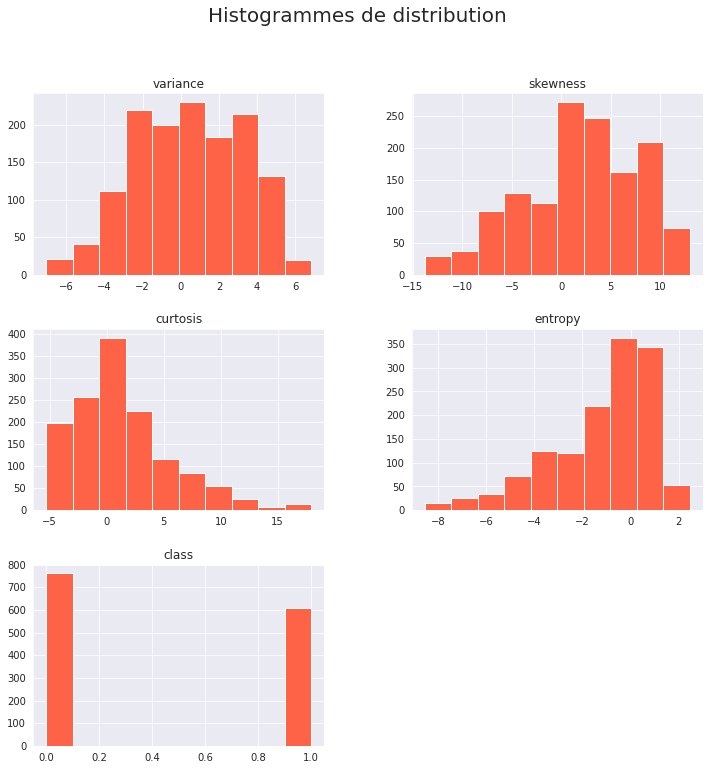

In [18]:
# 1. Créer un histogramme de distribution

# Créer une matrice de graphiques pour toutes les variables en même temps
data.hist(bins=10, color="tomato", figsize=(12,12))
plt.suptitle("Histogrammes de distribution", fontsize=20)
plt.show()

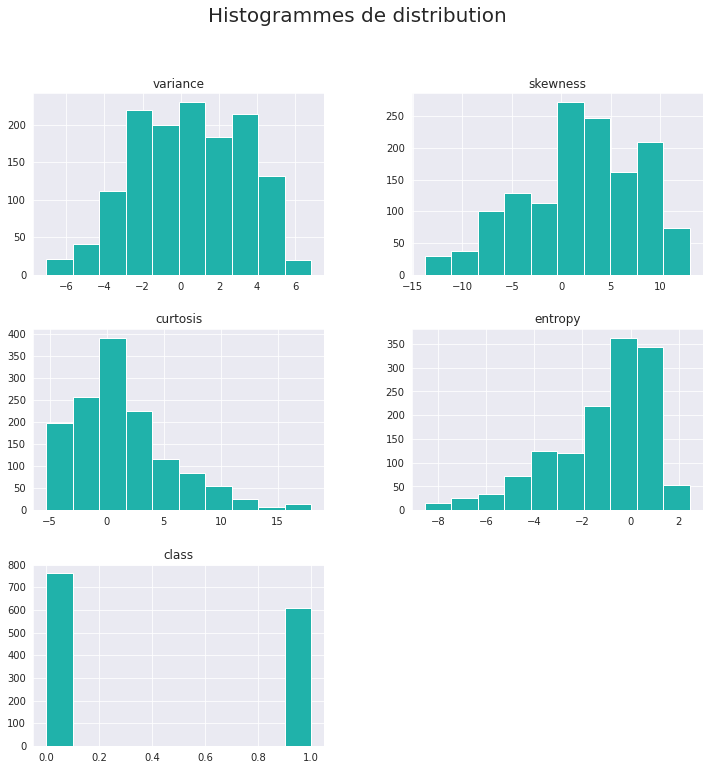

In [19]:
# Créer une matrice de graphiques pour toutes les variables en même temps
data.hist(bins=10, color="lightseagreen", figsize=(12,12))
plt.suptitle("Histogrammes de distribution", fontsize=20)
plt.show()

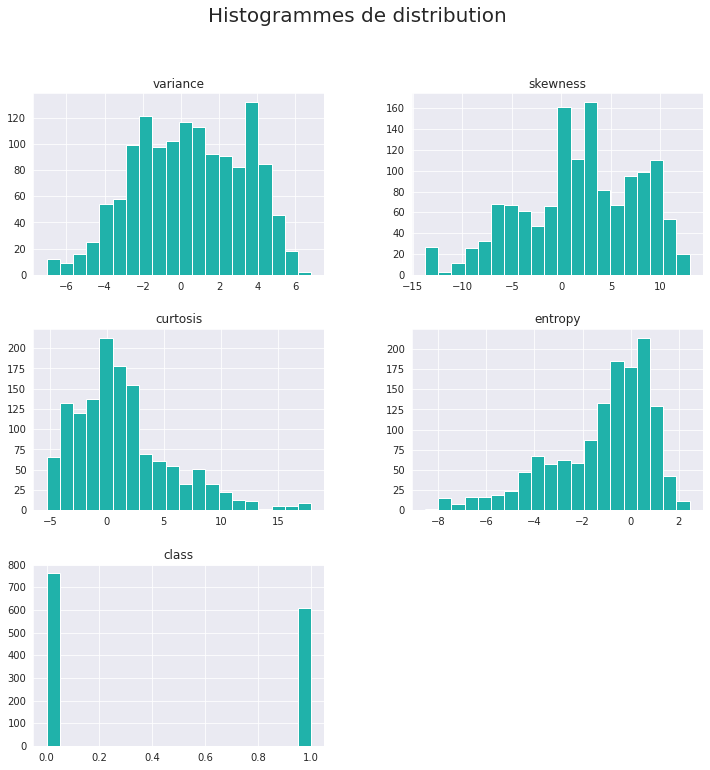

In [20]:
# Créer une matrice de graphiques pour toutes les variables en même temps
data.hist(bins=20, color="lightseagreen", figsize=(12,12))
plt.suptitle("Histogrammes de distribution", fontsize=20)
plt.show()

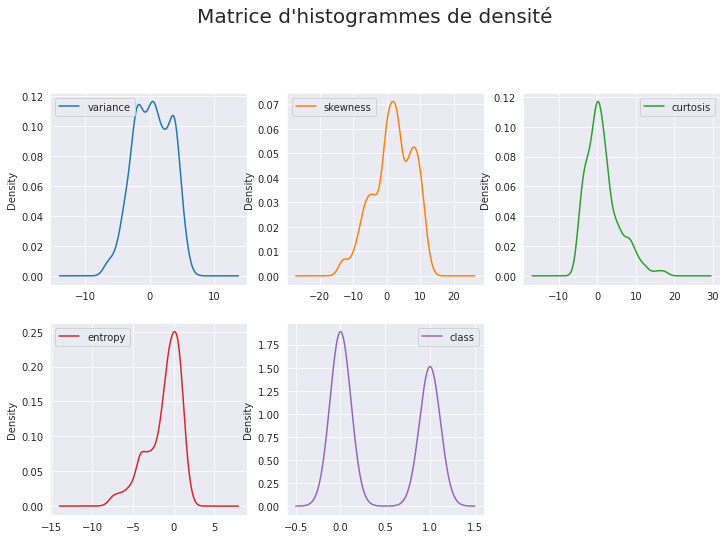

In [21]:
# 2. Créer des diagrammes de densité

# Créer une matrice de graphiques pour toutes les variables en même temps
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12,12))
plt.suptitle("Matrice d'histogrammes de densité", fontsize=20)
plt.show()

In [22]:
# 3. Créer la matrice des **graphique boîte à moustache** pour chaque variable du jeu de données.

# Retour sur la fonction describe
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


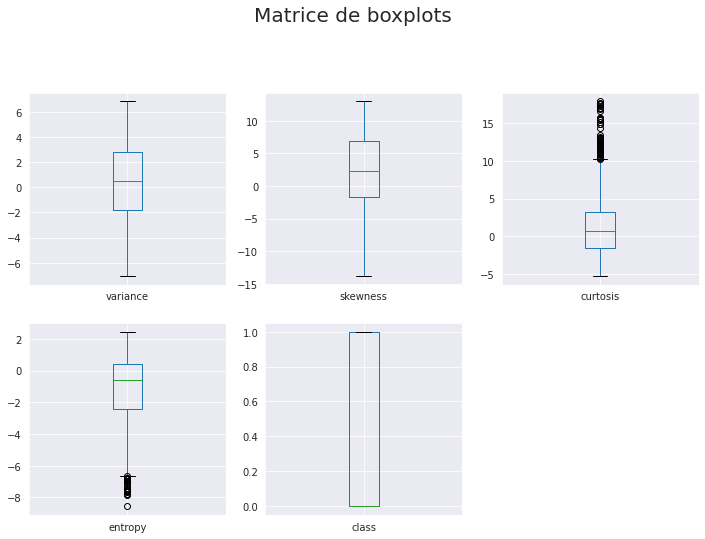

In [23]:
# Matrice de boxplots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,12))
plt.suptitle("Matrice de boxplots", fontsize=20)
plt.show()

In [24]:
# 4 Évaluer si le jeu de données est balancé
data.groupby('class').size()

class
0    762
1    610
dtype: int64

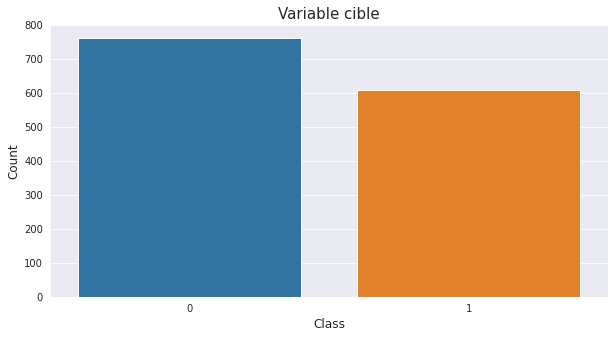

In [25]:
# Diagramme à barre (barplot)
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="class")
plt.title(label="Variable cible", fontsize=15)
plt.xlabel(xlabel="Class", fontsize=12)
plt.ylabel(ylabel="Count", fontsize=12)
plt.show()

In [26]:
# 5. Créer une matrice de corrélation

# Produire le tableau des corrélations
correlations = data.corr()
correlations

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


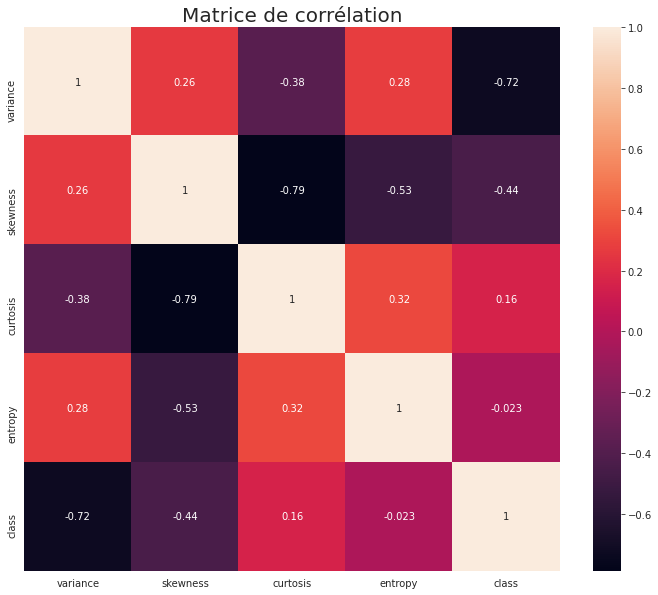

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(data=correlations, annot=True)
plt.title(label="Matrice de corrélation", fontsize=20)
plt.show()

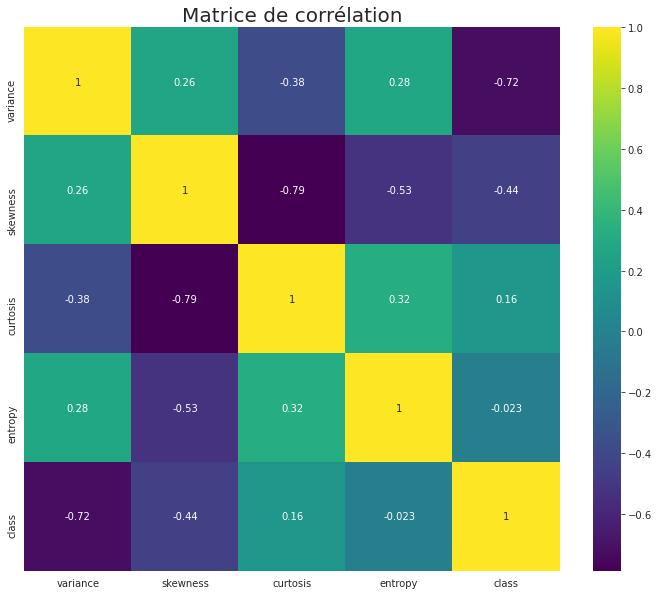

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(data=correlations, annot=True, cmap="viridis")
plt.title(label="Matrice de corrélation", fontsize=20)
plt.show()

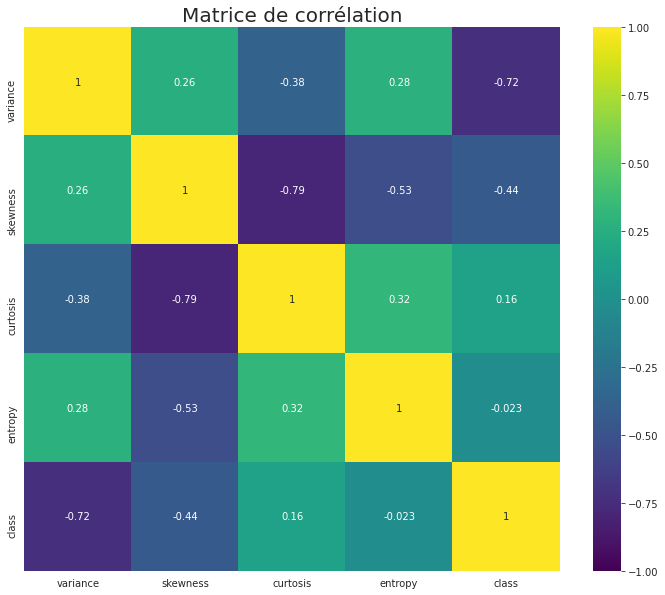

In [30]:
# Changer le gradient de couleur pour qu'il soit entre -1 et 1
plt.figure(figsize=(12,10))
sns.heatmap(data=correlations, annot=True, cmap="viridis", vmin=-1, vmax=1)
plt.title(label="Matrice de corrélation", fontsize=20)
plt.show()

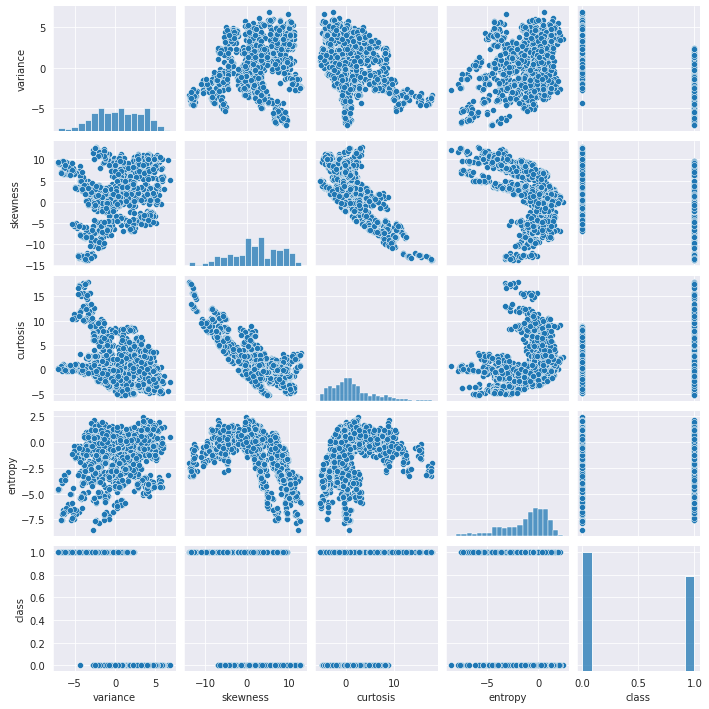

In [29]:
# 6. Créer une matrice de nuage de données
sns.pairplot(data=data, height=2)

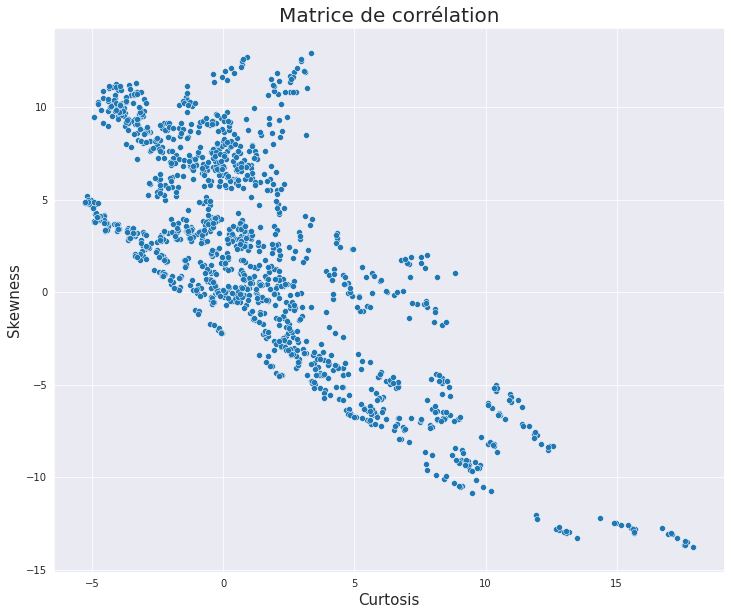

In [37]:
# 7 Graphique nuage de points mettant en relation les variables curtosis et skewness 
plt.figure(figsize=(12,10))
sns.scatterplot(x=data['curtosis'], y=data['skewness'])
plt.title(label="Matrice de corrélation", fontsize=20)
plt.xlabel('Curtosis', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.show()

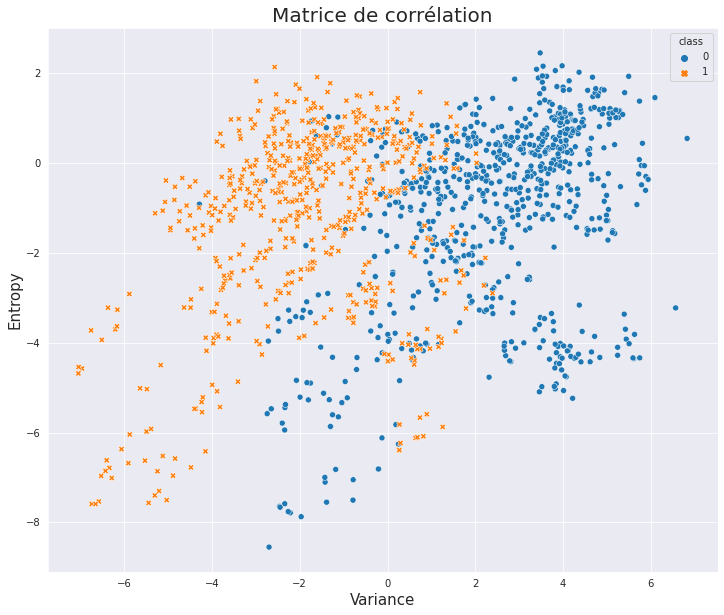

In [38]:
# 7 Graphique nuage de points mettant en relation les variables variance et entropy
plt.figure(figsize=(12,10))
sns.scatterplot(data=data, x='variance', y='entropy', hue='class', style='class')
plt.title(label="Matrice de corrélation", fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Entropy', fontsize=15)
plt.show()